# Lab One for UW AMATH 563
## Assignment: Implement Neural Network for XOR gate from scratch 
## By Rebecca Lopez

In [1]:
#Import Necessary Packages & Libraries 
import numpy as np 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from itertools import permutations
import matplotlib.cm as cm

# Import necessary modules
from sklearn.linear_model import LogisticRegressionCV

In [3]:
# XOR table
XOR_table = pd.read_csv('XOR_table.csv')

XOR_table = XOR_table.values
X = XOR_table[:, :2]
targets = XOR_table[:, -1].reshape(-1,1)

# Define dimensions on input, hidden and output layers
input_dim, hidden_dim, output_dim = 2,10,1

# Define learning rate
learning_rate=1e-1

# Define a hidden layer
W1=np.random.rand(input_dim,hidden_dim)

# Define an output layer
W2=np.random.rand(hidden_dim,output_dim)


# Define sigmoid activation function
def sig(x):
    return 1/(1+np.exp(-x))

iter_num=10000
loss = np.zeros((iter_num, 1))
L2=[]
for i in range(iter_num):

  #Forward pass: compute predicted y

    z=sig(np.dot(X,W1))
    y=sig(np.dot(z,W2))

  #Compute and print L2-norm loss
    J=np.sum(np.square(y-targets))/(X.shape[0])

  #Backprop to compute gradients of w1 and w2 with respect to L2-norm loss
    
    a1=(y-targets)*y*(1-y)
    dJdW2=np.dot(z.T,a1)

    
    a2=np.dot(a1,W2.T)*z*(1-z)
    a3=np.dot(X.T,a2)
    dJdW1=2*a3

  #Update weights
    W2=W2-learning_rate*dJdW2
    W1=W1-learning_rate*dJdW1

  #Save loss to an array
    loss[i]=J

You can find my implementation of the training code the XOR network above. Note that we can see our true ouput versus our predicted output where our predicted is not that far off from the true values.

In [4]:
#Produce table of predicted versus true values
flatten_targets = np.ndarray.flatten(targets)
flatten_y = np.ndarray.flatten(y)
pd.DataFrame({"X":X[:,0], "Y": X[:,1],"True Ouput":flatten_targets, "Predicted":flatten_y})

,X,Y,True Ouput,Predicted
0,0,0,0,0.071827
1,0,1,1,0.933747
2,1,0,1,0.933555
3,1,1,0,0.059837


Note that my loss between the target values and the predicted values at first greatly decreases and then more slowly converges to a smaller loss over time (as seen in plot below).

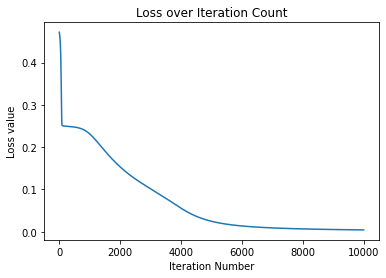

In [5]:
#Plot Loss Function over Iteration Count
plt.figure()    
plt.plot(loss)
plt.xlabel("Iteration Number")
plt.ylabel("Loss value")
plt.title("Loss over Iteration Count")
plt.show()

Note if this case, we do not fully have a validation set beyond the four points we have. In order to evaluate the performance of our network, we input grid of points in order to view the decision boundary. We can clearly see from the plot produced for question 5 and the table produced for question 2, that our model performs quite well in separating and classifying our input values.


In the plot we produce below, we can see diagonal separation between outputs that relies on not just one line but two. I notice that the bottom line of the decision boundary is quite linear while the top is quite curved, this is an interesting effect of the neural net approach as it classifies the inputs that are simply one and zero.

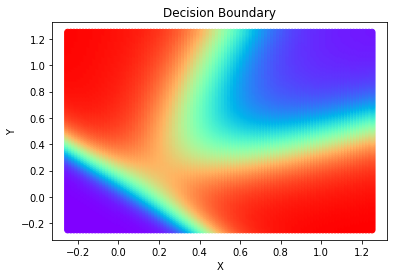

In [6]:
#Form a grid
h=100
xx=np.linspace(-.25,1.25,h)
yy=np.linspace(-.25,1.25,h)

X = []
A=[]
B=[]
for i in range(h):
    for j in range(h):
        X.append([xx[i],yy[j]])
        A.append(xx[i])
        B.append(yy[j])

#Use Weights produced above 
z=sig(np.dot(X,W1))
out=sig(np.dot(z,W2))
flatten_out=np.ndarray.flatten(out)

#Plot Decision Boundry for XOR table
df=pd.DataFrame({'x':A,'y':B,'z':flatten_out})
plt.figure()
plt.scatter(df.x,df.y,c=df.z,cmap=cm.rainbow)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Decision Boundary")
plt.show()